In [2]:
pip install pandas_datareader

     |████████████████████████████████| 107 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [5]:
def generate_data(index_saham, start, end):
    data_all = pandas_datareader.data.DataReader(index_saham, 'yahoo', start,end)
    data_all.reset_index(inplace=True)
    x_all = pd.DataFrame(data_all.Date.astype(str).str.split('-').tolist(),columns="year month date".split())
    y_all = data_all.Close
    return x_all, y_all, data_all
start_date = dt.datetime(2014, 12, 31)
end_date = dt.datetime.now()
x_all, y_all, data_all = generate_data('BBTN.JK', start_date, end_date)

In [6]:
data_all

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,1225.0,1195.0,1205.0,1225.0,9350500.0,1109.672974
1,2015-01-05,1225.0,1205.0,1220.0,1220.0,9422400.0,1105.143555
2,2015-01-06,1210.0,1180.0,1210.0,1195.0,13978100.0,1082.497192
3,2015-01-07,1215.0,1200.0,1210.0,1205.0,4726400.0,1091.555786
4,2015-01-08,1230.0,1205.0,1215.0,1210.0,19429000.0,1096.084961
...,...,...,...,...,...,...,...
1446,2020-09-30,1230.0,1165.0,1220.0,1200.0,41894500.0,1200.000000
1447,2020-10-01,1240.0,1205.0,1220.0,1235.0,49717400.0,1235.000000
1448,2020-10-02,1240.0,1180.0,1235.0,1210.0,34110800.0,1210.000000
1449,2020-10-05,1240.0,1205.0,1225.0,1240.0,31300300.0,1240.000000


In [7]:
def tranformasi_data(x_all, x_tr):
    scaler = StandardScaler()
    scaler.fit(x_all)
    x_all_tr = scaler.transform(x_tr)
    return x_all_tr
x_all_tr = tranformasi_data(x_all, x_all)
x_all

,year,month,date
0,2015,01,02
1,2015,01,05
2,2015,01,06
3,2015,01,07
4,2015,01,08
...,...,...,...
1446,2020,09,30
1447,2020,10,01
1448,2020,10,02
1449,2020,10,05


In [8]:
x_all_tr

array([[-1.46321728, -1.56818496, -1.56400768],
       [-1.46321728, -1.56818496, -1.22250861],
       [-1.46321728, -1.56818496, -1.10867559],
       ...,
       [ 1.56636074,  1.08212272, -1.56400768],
       [ 1.56636074,  1.08212272, -1.22250861],
       [ 1.56636074,  1.08212272, -1.10867559]])

In [9]:
def model(x_all_tr, y_all):
    gcs = GridSearchCV(SVR(kernel='rbf'),
                       param_grid={'gamma': [5, 6, 7, 8, 9, 10]},
                       cv=5,
                       scoring='neg_mean_squared_error')
    grid_result = gcs.fit(x_all_tr, y_all)
    best_params = grid_result.best_params_
    best_svr = SVR(kernel='rbf', C=1e3, gamma=best_params["gamma"])
    best_svr.fit(x_all_tr, y_all)
    y_pred = best_svr.predict(x_all_tr)
    return y_pred, best_svr
y_pred, best_svr = model(x_all_tr, y_all)

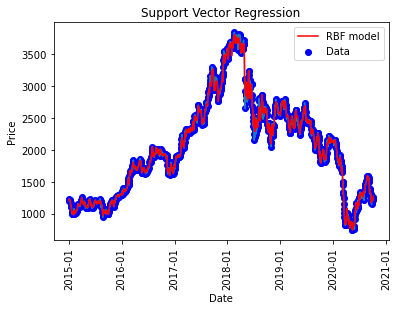

In [10]:
def plot(y_pred, data_all):
    fig, ax1 = plt.subplots()
    plt.plot(data_all.Date, data_all.Close)
    monthyearFmt = mdates.DateFormatter('%Y-%m')
    ax1.xaxis.set_major_formatter(monthyearFmt)
    _ = plt.xticks(rotation=90)
    plt.plot(data_all.Date, y_pred, c='r', label='RBF model')
    plt.scatter(data_all.Date, data_all.Close, c='b', label='Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
plot(y_pred, data_all)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MSE: {0:.3f}'.format(mean_squared_error(y_all, y_pred)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_all, y_pred)))
print('R^2: {0:.3f}'.format(r2_score(y_all, y_pred)))

MSE: 1303.304
MAE: 16.143
R^2: 0.998


In [13]:
prediksi_tanggal = '2020-10-07'
y, m, d = prediksi_tanggal.split('-')
c = [[y, m, d]]
c_tr = tranformasi_data(x_all, c)
best_svr.predict(c_tr)

array([1321.92582605])